In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Define constants
l = 1E-3
n_t = 1E-3
rhow = 6.3382E28
N_Tis = 6 * rhow
T = 1000
k_B = 8.617333E-5

# Load data
a = np.loadtxt('Flux2EvTrap.txt')
b = np.loadtxt('Medium_flux_festim.txt')
time = a[:, 0]

# Calculate constants
D = 1.9E-7 * np.exp(-0.2 / k_B / T)
S = 2.9E-5 * np.exp(-1 / k_B / T)
N_A_const = 6.02214076E23
c0m = (1E5)**0.5 * S * 1.0525E5


# Plot figures
plt.figure(1)

fluxbulk3=pd.read_csv('flux_bulk_3.out',  delim_whitespace=True)  # Adjust the delimiter as needed
new_column_names = {
    'time(s)': 'Time',
    'N_conf_rec*flux_bulk(molecule.m-2s-1)': 'Flux'
}

fluxbulk3.rename(columns=new_column_names, inplace=True)



<Figure size 640x480 with 0 Axes>

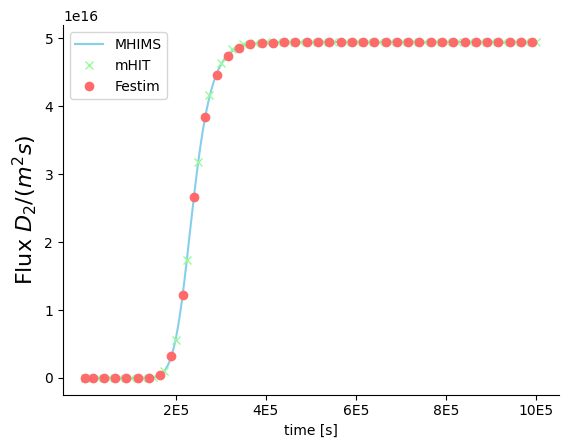

In [18]:
time_column = fluxbulk3['Time']  
flux_column = fluxbulk3['Flux'] 
x = [2E5, 4E5, 6E5, 8E5, 10E5]
# Your string vector for x-tick labels
x_labels = ['2E5', '4E5', '6E5', '8E5', '10E5']
# Set the x-tick locations and labels



plt.plot(fluxbulk3['Time'],fluxbulk3['Flux'],color='#87CEEB',label='MHIMS')
plt.plot(a[::25, 0], a[::25, 1], 'x', color='#98FB98',label='mHIT')
plt.plot(b[::250, 0], b[::250, 1], 'o', color='#FF6B6B', label='Festim')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.title('H flux on the other side of a slab with constant concentration interface - strong trap [2eV]')
# plt.ylabel(r'Flux $\frac{D_2}{\mathrm{m^2 \, s}}$')
plt.xlabel('time [s]')
plt.ylabel(r'Flux $D_2 /(m^{2} s)}$', size=16)
plt.legend( loc='best')
plt.xticks(x, x_labels)
plt.savefig('IntermediateTrap.jpg',dpi=450)
plt.show()


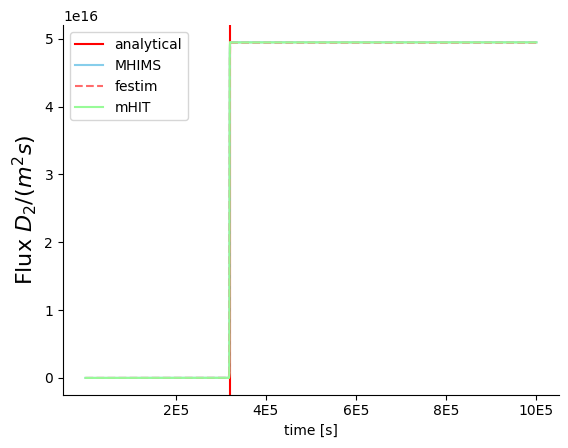

In [19]:
a = np.loadtxt('Flux25EvTrap2.txt')
b = np.loadtxt('Strong_flux_festim.txt')


strong_breakthrough = l**2 * n_t * rhow / (2 * c0m * N_Tis * D)
fluxbulk4=pd.read_csv('flux_bulk_4.out',  delim_whitespace=True) 
new_column_names = {
    'time(s)': 'Time',
    'N_conf_rec*flux_bulk(molecule.m-2s-1)': 'Flux'
}

fluxbulk4.rename(columns=new_column_names, inplace=True)
stronganalytical = l**2 * n_t / (2 * c0m * D) * rhow / 6.02214076E23


plt.axvline(x=stronganalytical, color='r',label='analytical')
plt.plot(fluxbulk4['Time'], fluxbulk4['Flux'], color='#87CEEB',label='MHIMS')
plt.plot(b[:, 0], b[:, 1], '--', color='#FF6B6B',label='festim')
plt.plot(a[:, 0], a[:, 1],label='mHIT',color='#98FB98')
plt.legend( loc='best')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('time [s]')
# plt.ylabel(r'Flux $\frac{D_2}{\mathrm{m^2 \, s}}$')
plt.ylabel(r'Flux $D_2 /(m^{2} s)}$', size=16)
plt.xticks(x, x_labels)
plt.savefig('StrongTrap.jpg',dpi=450)



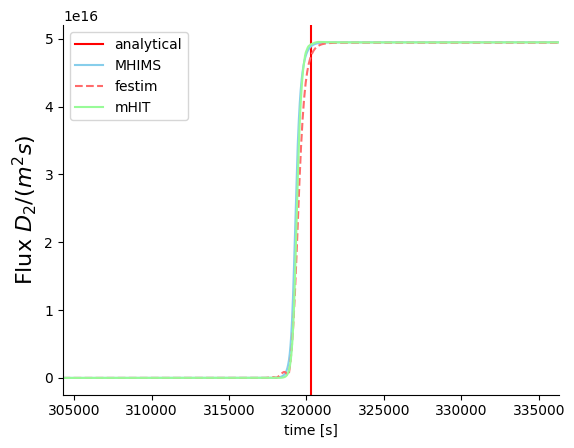

In [20]:
plt.axvline(x=stronganalytical, color='r',label='analytical')
plt.plot(fluxbulk4['Time'], fluxbulk4['Flux'], color='#87CEEB',label='MHIMS')

plt.plot(b[:, 0], b[:, 1], '--', color='#FF6B6B',label='festim')
plt.plot(a[:, 0], a[:, 1],label='mHIT',color='#98FB98')
plt.legend( loc='best')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('time [s]')
# plt.ylabel(r'Flux $\frac{D_2}{\mathrm{m^2 \, s}}$')
plt.ylabel(r'Flux $D_2 /(m^{2} s)}$', size=16)
plt.xlim([stronganalytical*0.95,stronganalytical*1.05])
plt.savefig('StrongTrapZoom.jpg',dpi=450)

